# Explanatory Data Analysis

## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_directory = 'data/'

data = pd.concat([pd.read_csv(data_directory + 'train.csv'), 
                  pd.read_csv(data_directory + 'test.csv'), 
                  pd.read_csv(data_directory + 'valid.csv')])

In [7]:
data

,en,vi,source
0,"- Sorry, that question's not on here.","- Xin lỗi, nhưng mà ở đây không có câu hỏi đấy.",OpenSubtitles v2018
1,He wants you to come with him immediately.,Ông ấy muốn bố đi với ông ấy ngay lập tức,OpenSubtitles v2018
2,I thought we could use some company.,Tôi nghĩ chúng ta có thể muốn vài người bạn đồ...,OpenSubtitles v2018
3,It was founded in 2008 by this anonymous progr...,Nó được sáng lập vào năm 2008 bởi một lập trìn...,TED2020 v1
4,"With both of these methods, no two prints are ...","Với cả hai phương pháp, không có hai bản in nà...",TED2020 v1
...,...,...,...
11311,Rhozali is a professor of linguistics at the u...,Rhozali là giáo sư ngôn ngữ học tại trường đại...,wikimedia v20210402
11312,You're sorry you ever joined the Brotherhood?,Mày hối hận vì gia nhập Hội anh em à?,OpenSubtitles v2018
11313,"How long has it been doing that, exactly?",Em làm được như vậy bao lâu rồi?,OpenSubtitles v2018
11314,"I'm not going to dive into them either, but ph...","Tôi sẽ không đi sâu vào chúng, nhưng tính năng...",TED2020 v1


## Simple analysis

Overall data decription:

In [8]:
data.describe(include='all')

,en,vi,source
count,2906992,2906992,2906992
unique,2906992,2906992,8
top,"- Sorry, that question's not on here.","- Xin lỗi, nhưng mà ở đây không có câu hỏi đấy.",OpenSubtitles v2018
freq,1,1,1459166


Calculate average length of 'en' senetences and 'vi' sentences:

In [10]:
# Calculate the average length of 'en' sentences
avg_length_en = data['en'].apply(len).mean()

# Calculate the average length of 'vi' sentences
avg_length_vi = data['vi'].apply(len).mean()

print('Average length of English sentences: ', round(avg_length_en))
print('Average length of Vietnamese sentences: ', round(avg_length_vi))

Average length of English sentences:  79
Average length of Vietnamese sentences:  81


Partition of sources:

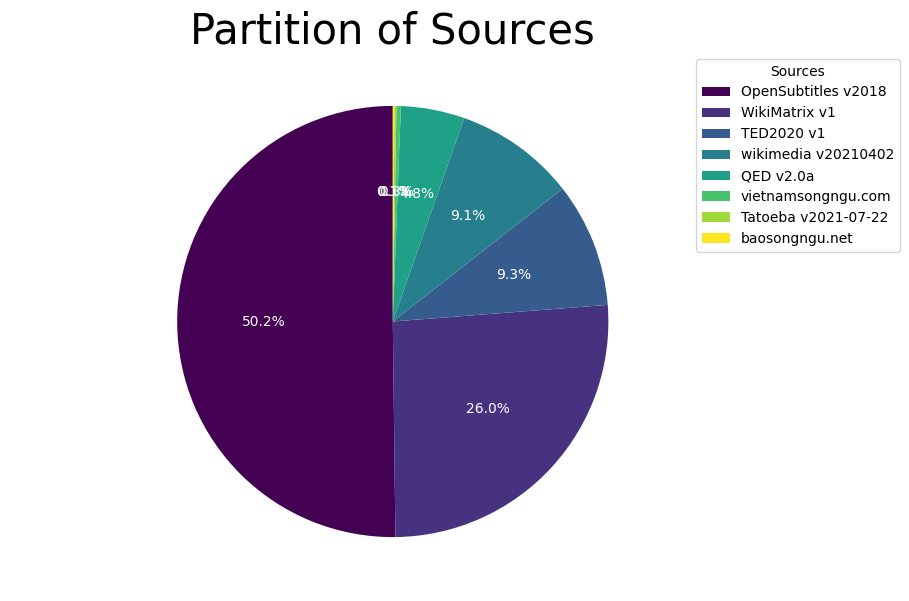

In [22]:
# Count the occurrences of each source
source_counts = data['source'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 7))
source_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', textprops={'color': 'w'})
plt.title('Partition of Sources', fontsize=30)
plt.ylabel('')  # Hide the y-label
plt.legend(source_counts.index, title="Sources", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## More specific analysis

Distribution of the length of sentences:

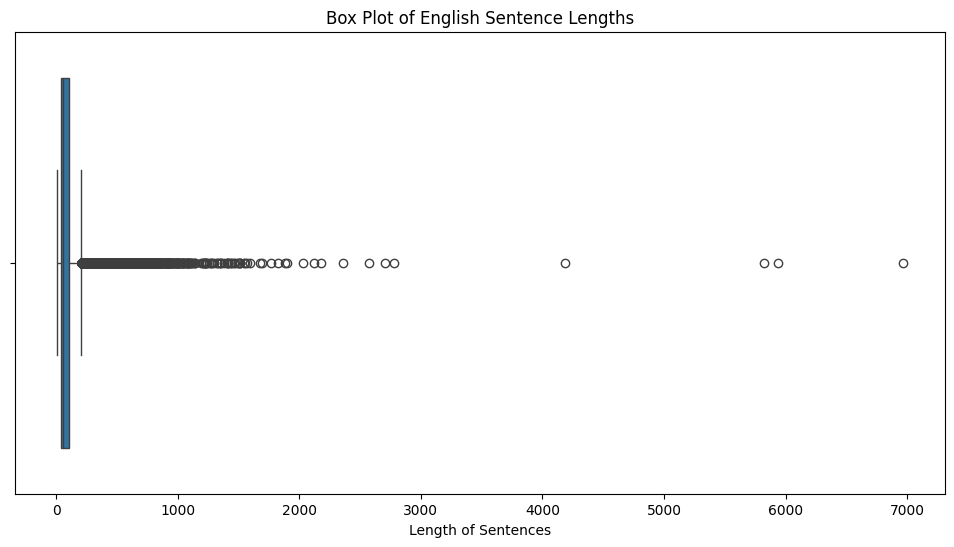

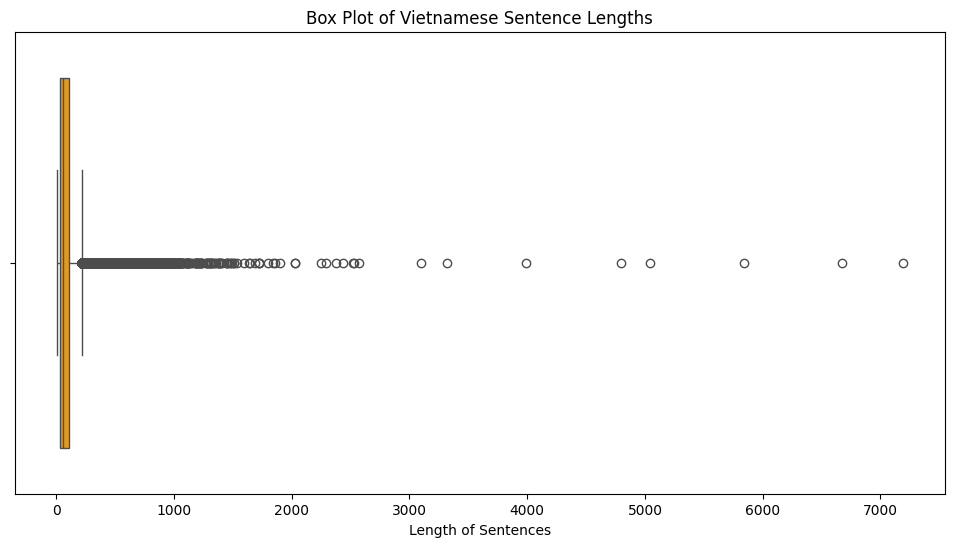

In [43]:
# Calculate the length of 'en' and 'vi' sentences
data['en_length'] = data['en'].apply(len)
data['vi_length'] = data['vi'].apply(len)

# Plot the box plot for English sentences
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['en_length'])
plt.title('Box Plot of English Sentence Lengths')
plt.xlabel('Length of Sentences')
plt.show()

# Plot the box plot for Vietnamese sentences
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['vi_length'], color='orange')
plt.title('Box Plot of Vietnamese Sentence Lengths')
plt.xlabel('Length of Sentences')
plt.show()


Analysis of absolute difference between English and Vietnamese length

C:\Users\aupho\AppData\Local\Temp\ipykernel_43120\3852654548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='source', x='length_diff', data=data, palette='viridis')


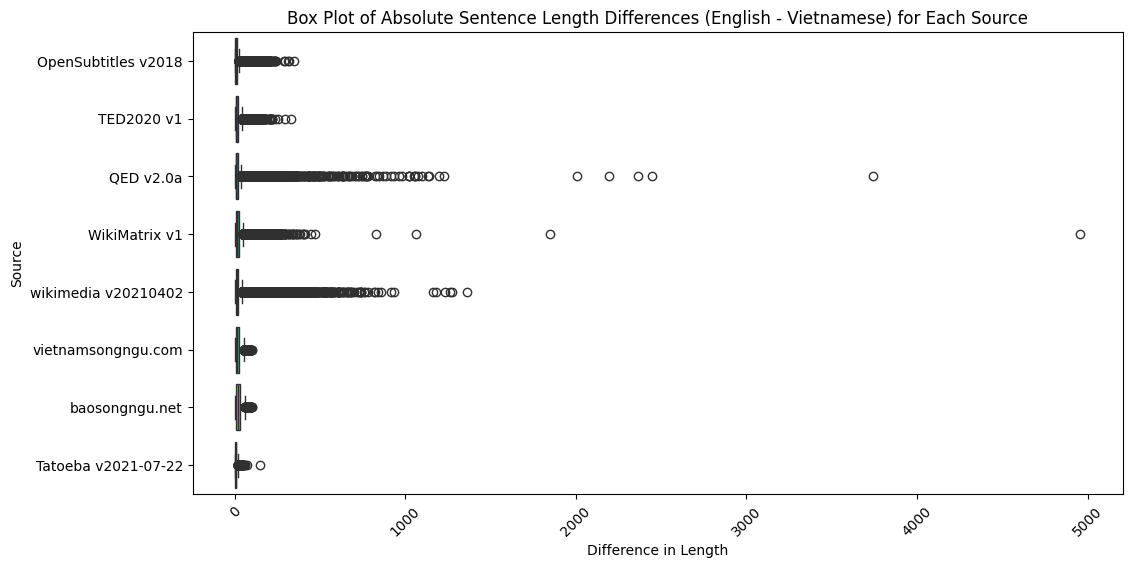

Mean absolute difference in sentence length (English - Vietnamese) for OpenSubtitles v2018: 8.97
Mean absolute difference in sentence length (English - Vietnamese) for TED2020 v1: 13.15
Mean absolute difference in sentence length (English - Vietnamese) for QED v2.0a: 14.09
Mean absolute difference in sentence length (English - Vietnamese) for WikiMatrix v1: 17.23
Mean absolute difference in sentence length (English - Vietnamese) for wikimedia v20210402: 16.46
Mean absolute difference in sentence length (English - Vietnamese) for vietnamsongngu.com: 16.84
Mean absolute difference in sentence length (English - Vietnamese) for baosongngu.net: 20.57
Mean absolute difference in sentence length (English - Vietnamese) for Tatoeba v2021-07-22: 6.83


In [42]:
# Split the data into each source
sources = data['source'].unique()

# Calculate the absolute difference in length between English and Vietnamese sentences
data['length_diff'] = (data['en_length'] - data['vi_length']).abs()

# Plot the box plot of the length differences for each source
plt.figure(figsize=(12, 6))
sns.boxplot(y='source', x='length_diff', data=data, palette='viridis')
plt.title('Box Plot of Absolute Sentence Length Differences (English - Vietnamese) for Each Source')
plt.ylabel('Source')
plt.xlabel('Difference in Length')
plt.xticks(rotation=45)
plt.show()

# Calculate and print the mean difference for each source
for source in sources:
	source_data = data[data['source'] == source]
	mean_diff = source_data['length_diff'].mean()
	print(f'Mean absolute difference in sentence length (English - Vietnamese) for {source}:', round(mean_diff, 2))
